In [2]:
#import nltk
#nltk.download()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk #natural language tool kit
import re  # regular expression library
import requests #library to work with URLs

## Load Data

In [4]:
austriaWiki=requests.get("https://en.wikipedia.org/wiki/Austria")

In [5]:
from bs4 import BeautifulSoup
austriaDf=BeautifulSoup(austriaWiki.content,"lxml")

In [6]:
austriatxt=austriaDf.getText(strip=True)

In [7]:
print(austriatxt)

Austria - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide(Top)1Etymology2HistoryToggle History subsection2.1Prehistory and antiquity2.2Middle Ages2.317th and 18th centuries2.419th century2.5Early 20th century2.6Interwar period and World War II2.6.1Nazi rule2.7Allied occupation2.8Independence3Government and politicsToggle Government and politics subsection3.1Since 20063.2Foreign relations3.3Military3.4Administrative divisions4GeographyToggle Geography subsection4.1Climate5EconomyToggle Economy subsection5.1Infrastructure and natural resources6DemographicsToggle Demographics subsection6.1Largest cities6.2Language6.3Ethnic groups6.4Religion6.5Educati

## Cleaning text

In [8]:
#replace digits in [] or [23] with space
austriatxt=re.sub(r'\[\d+\]'," ",austriatxt)

#re.sub(pattern to be replaced, pattern replacement)," " indicates space

In [9]:
austriatxt=re.sub(r'\[\w+\]'," ",austriatxt)

In [10]:
austriatxt=re.sub(r'\(\w+\)'," ",austriatxt)

In [11]:
austriatxt=re.sub(r'[0-9]+'," ",austriatxt) #Remove digits 

In [12]:
austriatxt=re.sub("\xa0°C"," ",austriatxt) 

In [13]:
austriatxt

'Austria - WikipediaJump to contentMain menuMain menumove to sidebarhideNavigationMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usContributeHelpLearn to editCommunity portalRecent changesUpload fileSpecial pagesSearchSearchAppearanceDonateCreate accountLog inPersonal toolsDonateCreate accountLog inPages for logged out editorslearn moreContributionsTalkContentsmove to sidebarhide  Etymology HistoryToggle History subsection . Prehistory and antiquity . Middle Ages . th and  th centuries . th century . Early  th century . Interwar period and World War II . . Nazi rule . Allied occupation . Independence Government and politicsToggle Government and politics subsection . Since  . Foreign relations . Military . Administrative divisions GeographyToggle Geography subsection . Climate EconomyToggle Economy subsection . Infrastructure and natural resources DemographicsToggle Demographics subsection . Largest cities . Language . Ethnic groups . Religion . Education . Health .

## Word Tokenization

In [14]:
from nltk.tokenize import sent_tokenize

In [15]:
austriaSentences= sent_tokenize(austriatxt) #breaking into sentnces
austriaSentences=pd.DataFrame(austriaSentences,columns=['sentence'])

In [16]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from textblob import TextBlob

In [18]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Neutral"
    else:
        return "Negative"

In [19]:
austriaSentences['sentiment']=[str(analyze_sentiment(x)) for x in austriaSentences.sentence]

In [20]:
austriaSentences['sentiment'].value_counts()

sentiment
Neutral     626
Positive    333
Negative     87
Name: count, dtype: int64

## Tokenization

In [21]:
# NLP core format is words/tokens
from nltk.tokenize import word_tokenize

In [22]:
austria_words=word_tokenize(austriatxt) # break content into words/tokens
austria_words=[w.lower() for w in austria_words] # convert to lowercase or smallcaps
austria_words=[w for w in austria_words if w.isalnum()] # selects only alphabets

In [23]:
from nltk.corpus import stopwords

In [24]:
english_stopwords=set(stopwords.words("english"))# stopwords are is, a,a the, then, it, to,etc
austria_words=[w for w in austria_words if not w in english_stopwords] # remove stopwords
austria_words=[w for w in austria_words if len(w)>2] # Select words with more than 2 characters

In [25]:
from nltk.probability import FreqDist
wordfreq=FreqDist(austria_words)
wordfreq.most_common(20)

[('austria', 290),
 ('retrieved', 146),
 ('original', 121),
 ('austrian', 117),
 ('german', 56),
 ('may', 51),
 ('december', 50),
 ('february', 49),
 ('world', 44),
 ('march', 39),
 ('october', 38),
 ('april', 35),
 ('also', 34),
 ('november', 34),
 ('war', 33),
 ('january', 33),
 ('july', 32),
 ('vienna', 32),
 ('state', 31),
 ('country', 30)]

## Forming word cloud

In [26]:
pip install -U wordcloud


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from wordcloud import WordCloud

In [28]:
austria_words1=(" ").join(austria_words)

In [29]:
wordcloud=WordCloud(width=1000,height=500,stopwords="english_stopwords",
                    max_words=250,colormap="plasma",
                    collocations=False).generate(str(austria_words1))

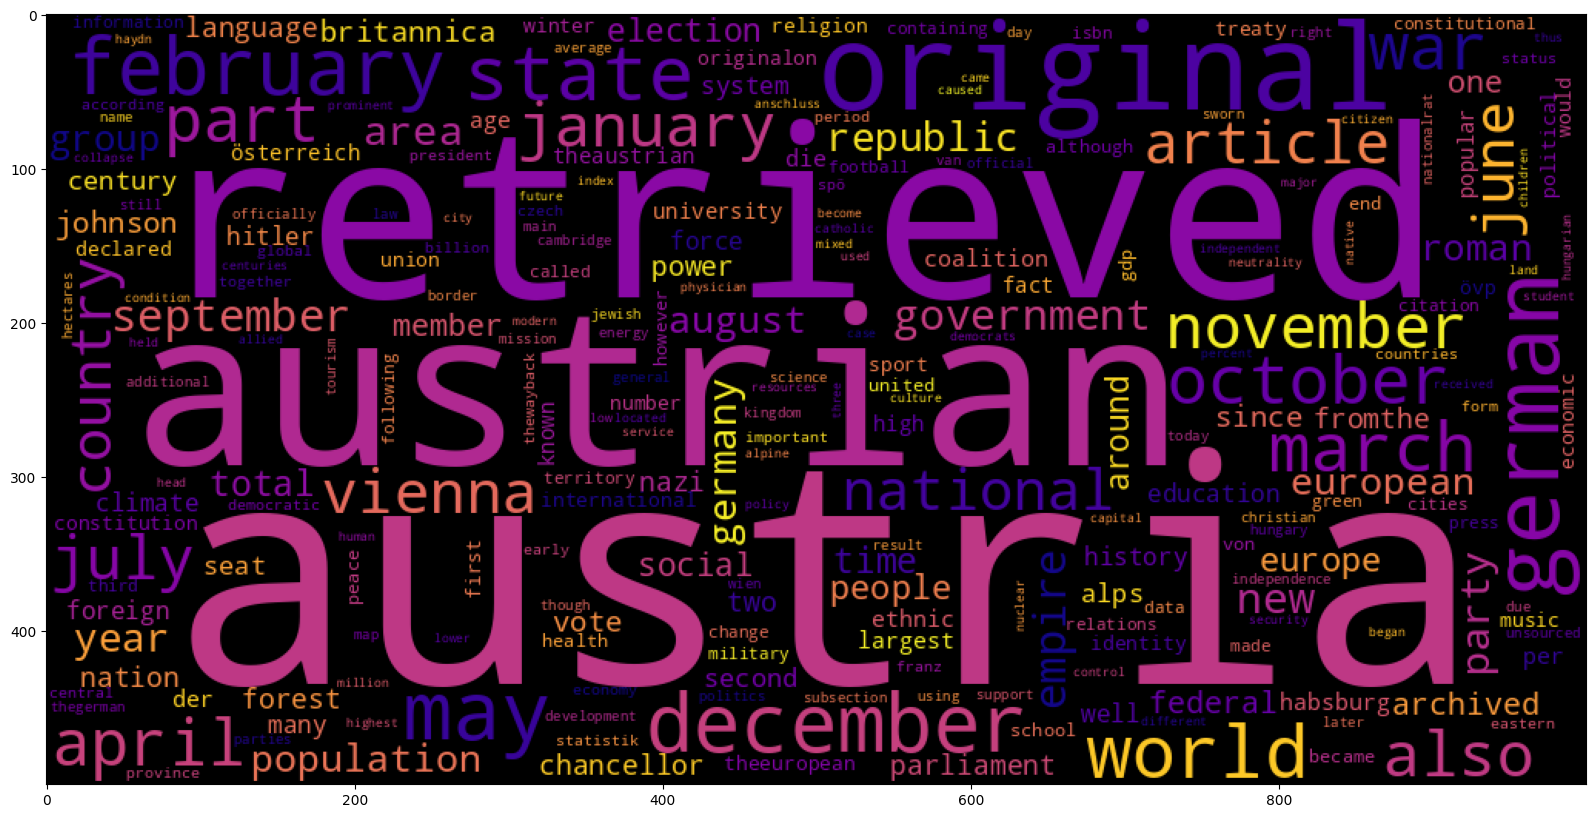

In [30]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

## Vectorization

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#To remove unneccesary stop words
english_stopwords=list(english_stopwords)
english_stopwords.extend("al ar bibcode doi et pdf pp retreived wg ch co cid issn spo th".split())

DTM=CountVectorizer(max_features=20,stop_words=list(english_stopwords))

In [33]:
X_dtm=DTM.fit_transform(austriaSentences.sentence)

In [34]:
pd.DataFrame(X_dtm.toarray(),columns=DTM.get_feature_names_out()).head()

,also,april,archivedfrom,austria,austrian,country,december,february,german,january,march,may,november,october,original,retrieved,state,vienna,war,world
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Word Embedding

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer # method:1 for machine leaning models

In [36]:
tfidf=TfidfVectorizer(max_features=20, stop_words=list(english_stopwords),ngram_range=(2,2))
X_tfidf=tfidf.fit_transform(austriaSentences.sentence)

In [37]:
pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_).head()

,world war,austrian german,archivedfrom original,retrieved may,original october,retrieved july,original september,retrieved august,retrieved december,original june,retrieved june,retrieved march,original february,retrieved april,archived fromthe,fromthe originalon,retrieved february,original april,lonnie johnson,original december
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from gensim.models import Word2Vec # Method2: for deep learning models 

In [40]:
model=Word2Vec([austria_words],vector_size=10,window=5,min_count=1)
model.wv['world'] #vectorization-word embeddings for each word 10 dimensional
model.wv['war'] #vectorization-word embeddings for each word 10 dimensional
model.wv.similarity('world','empire')
model.wv.similarity('world','war')
model.wv.most_similar('world')

[('theassassinationof', 0.9368096590042114),
 ('capita', 0.8635182976722717),
 ('countries', 0.8316435217857361),
 ('credit', 0.8300162553787231),
 ('willing', 0.823961615562439),
 ('traditions', 0.8160912394523621),
 ('red', 0.8142938017845154),
 ('tiếng', 0.8105959892272949),
 ('respects', 0.8095119595527649),
 ('population', 0.8091921210289001)]

In [41]:
x_tfid1=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_)

## Filter only Positive and Negative sentiments

In [49]:
# Filter out Neutral sentiments
binary_df = austriaSentences[austriaSentences['sentiment'] != 'Neutral'].copy()

# Reset indices
binary_df.reset_index(drop=True, inplace=True)

# Recreate TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_binary = tfidf.fit_transform(binary_df['sentence'])

# Encode sentiments again
from sklearn.preprocessing import LabelEncoder
y_binary = LabelEncoder().fit_transform(binary_df['sentiment'])  # 0: Negative, 1: Positive


## Applying Smote

In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Filter out Neutral sentiments
binary_df = austriaSentences[austriaSentences['sentiment'] != 'Neutral'].copy()
binary_df.reset_index(drop=True, inplace=True)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to avoid overfitting
X = tfidf.fit_transform(binary_df['sentence'])

# Encode sentiments
y = LabelEncoder().fit_transform(binary_df['sentiment'])  # 0: Negative, 1: Positive

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y).value_counts())
print(f"Negative samples: {sum(y==0)}, Positive samples: {sum(y==1)}")

# Split data BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Preserve class distribution in split
)

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Verify class distribution after SMOTE
print("\nClass distribution after SMOTE (training data only):")
print(pd.Series(y_train_sm).value_counts())
print(f"Negative samples: {sum(y_train_sm==0)}, Positive samples: {sum(y_train_sm==1)}")

# Test data remains untouched
print("\nTest set distribution (original):")
print(pd.Series(y_test).value_counts())

Class distribution before SMOTE:
1    333
0     87
Name: count, dtype: int64
Negative samples: 87, Positive samples: 333

Class distribution after SMOTE (training data only):
1    266
0    266
Name: count, dtype: int64
Negative samples: 266, Positive samples: 266

Test set distribution (original):
1    67
0    17
Name: count, dtype: int64


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(cm)

# Identify best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nBest model is {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")


--- Training Decision Tree ---
Accuracy: 0.7985
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81        63
           1       0.89      0.70      0.79        71

    accuracy                           0.80       134
   macro avg       0.81      0.80      0.80       134
weighted avg       0.82      0.80      0.80       134

Confusion Matrix:
[[57  6]
 [21 50]]

--- Training Random Forest ---
Accuracy: 0.8806
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.91      0.86      0.88        71

    accuracy                           0.88       134
   macro avg       0.88      0.88      0.88       134
weighted avg       0.88      0.88      0.88       134

Confusion Matrix:
[[57  6]
 [10 61]]

--- Training Gradient Boosting ---
Accuracy: 0.8433
Classification Report:
              precision    recall  f1-score   suppor

In [63]:
# Save the best model and vectorizer for Streamlit app
import pickle
import os

# Create directory if it doesn't exist
os.makedirs('sentiment_model', exist_ok=True)

# Save the best model
with open("sentiment_model/best_model.pkl", "wb") as f:
    pickle.dump({
        'model': best_model,
        'model_name': best_model_name,
        'accuracy': results[best_model_name]['accuracy']
    }, f)

# Save the TF-IDF vectorizer
with open("sentiment_model/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save the class names (for interpretation)
with open("sentiment_model/class_names.pkl", "wb") as f:
    pickle.dump({0: 'Negative', 1: 'Positive'}, f)

print(f"\nSaved {best_model_name} model and vectorizer to 'sentiment_model' directory")


Saved Random Forest model and vectorizer to 'sentiment_model' directory
